In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [6]:
# Function to calculate the mean of a column and plot it
def optimization_chart(file_name, suptitle = "Trend"):
    # DataFrame creation
    df = pd.read_csv(file_name)

    df = df.drop(columns = ['No.'])
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()

    # Grouping and calculating the average
    grouped = df.groupby('RS Lower Bound').mean()

    # Columns to plot
    columns_to_plot = ['% of Winners', 'Net % Profit', 'CAR', 'Sharpe Ratio', 'Max. Trade % Drawdown', 'Avg % Profit/Loss', '# Trades']

    # Determine number of rows and columns for the subplot grid
    n_cols = 2
    n_rows = math.ceil(len(columns_to_plot) / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))

    # Flatten axes for easy indexing and handle cases where there's an odd number of columns
    axes = axes.flatten()

    # Plot each column
    for i, column in enumerate(columns_to_plot):
        axes[i].plot(grouped.index, grouped[column], marker='o', color='b')
        axes[i].set_title(f'Mean {column}')
        axes[i].set_xlabel('RS Lower Bound')
        axes[i].set_ylabel(f'Mean {column}')
        axes[i].grid(True)

    # Hide unused subplots in case of an odd number of columns
    for j in range(len(columns_to_plot), len(axes)):
        axes[j].axis('off')

    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

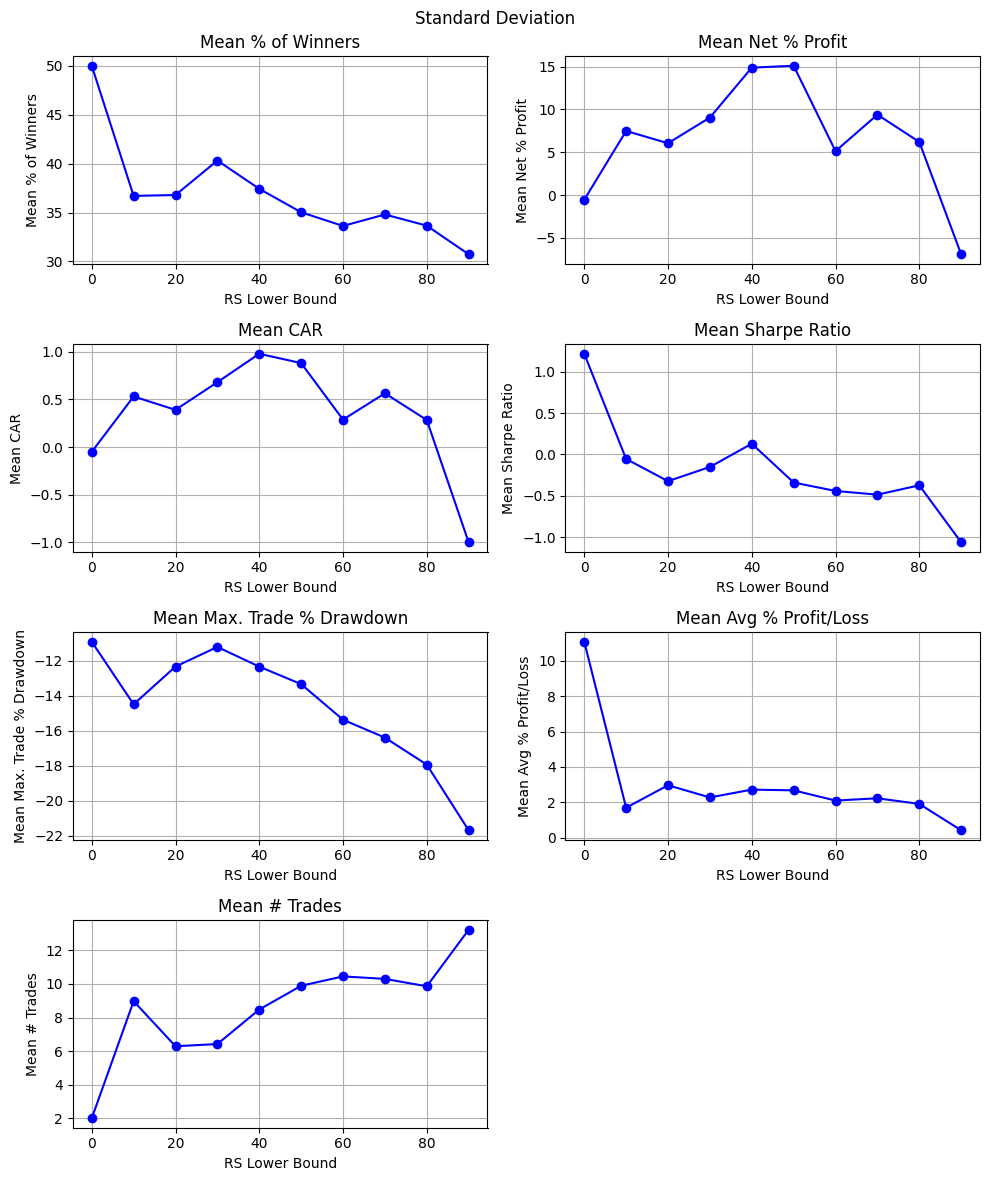

In [7]:
file_1 = "3.3_RS_std_Trend.csv"
optimization_chart(file_1, 'Standard Deviation')

In [25]:
# Function to calculate the mean of a column and plot it as box plots
def optimization_box(file_name, suptitle="Trend"):
    # DataFrame creation
    df = pd.read_csv(file_name)

    # Preprocess the data
    df = df.drop(columns=['No.'], errors='ignore')  # Drop 'No.' column if it exists
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
    df = df.dropna()  # Drop rows with missing values

    # Columns to plot
    columns_to_plot = ['% of Winners', 'Net % Profit', 'CAR', 'Sharpe Ratio', 
                       'Max. Trade % Drawdown', 'Avg % Profit/Loss', '# Trades']

    # Group the data by 'RS Lower Bound'
    grouped = df.groupby('RS Lower Bound')

    # Determine number of rows and columns for the subplot grid
    n_cols = 2
    n_rows = math.ceil(len(columns_to_plot) / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))

    # Flatten axes for easy indexing and handle cases where there's an odd number of columns
    axes = axes.flatten()

    # Plot each column
    for i, column in enumerate(columns_to_plot):
        # Extract data for the box plot
        data_to_plot = [group[column].values for _, group in grouped]
        labels = [str(key) for key in grouped.groups.keys()]  # Create labels for each group

        # Create box plot
        axes[i].boxplot(data_to_plot, tick_labels=labels, patch_artist=True, sym = '')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Lower Bound')
        axes[i].set_ylabel(column)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide unused subplots in case of an odd number of columns
    for j in range(len(columns_to_plot), len(axes)):
        axes[j].axis('off')

    # Add a super title to the figure
    fig.suptitle(suptitle, fontsize=16)
    plt.tight_layout()
    plt.show()

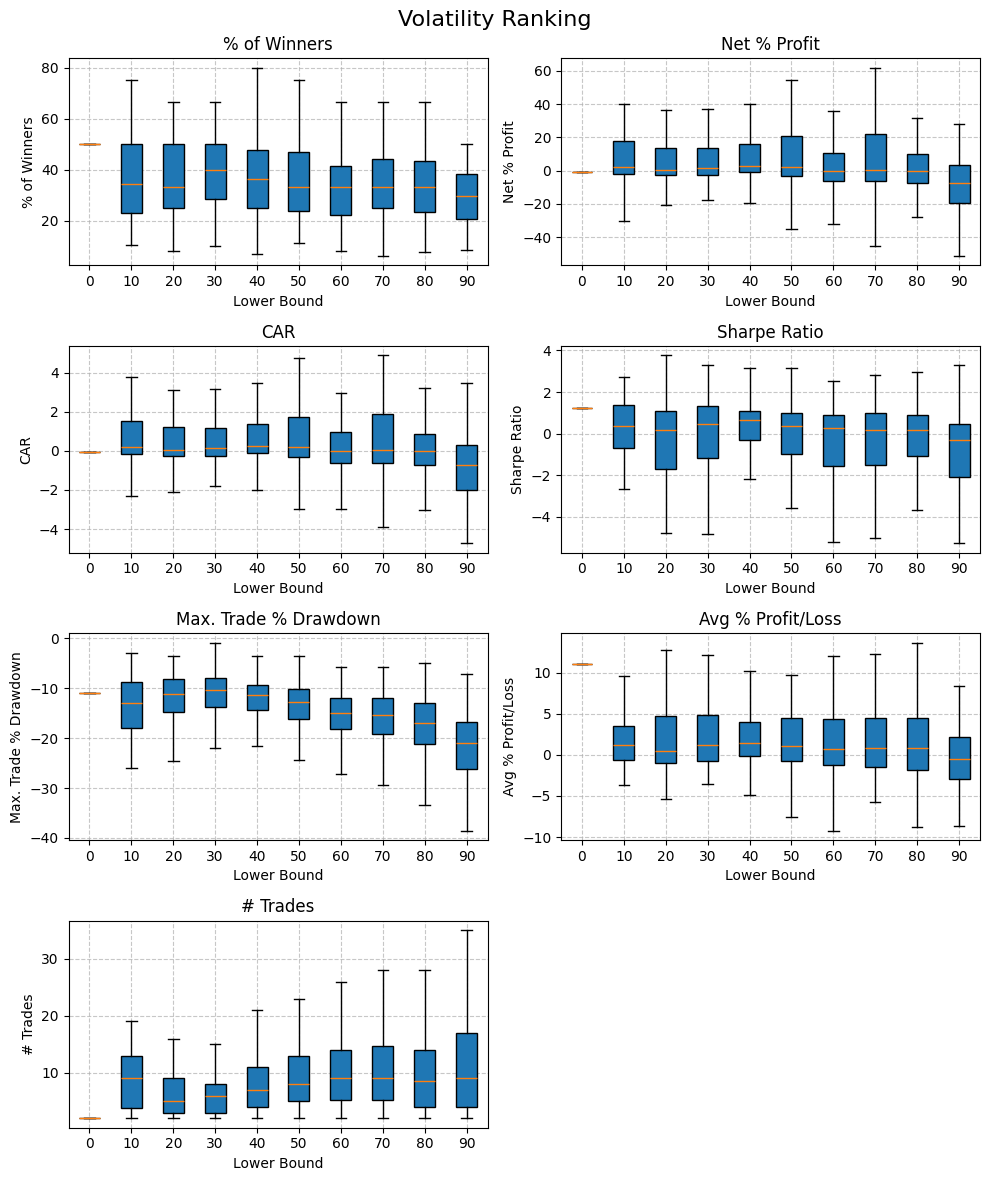

In [26]:
optimization_box(file_1, 'Volatility Ranking')